In [10]:

pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [15]:
online_sales = pd.read_csv("C://Users//manus//OneDrive//Analytixlabs//PG Certification in Data Science//4.0 TERM 02.2//14. Capstone Case Study - Findin//Reference//14.-Capstone-Case-Study-Finding-//14.-Capstone-Case-Study-Finding-Marketing-Insights//Online_Sales.csv")


In [16]:
customers_data = pd.read_excel("C://Users//manus//OneDrive//Analytixlabs//PG Certification in Data Science//4.0 TERM 02.2//14. Capstone Case Study - Findin//Reference//14.-Capstone-Case-Study-Finding-//14.-Capstone-Case-Study-Finding-Marketing-Insights//CustomersData.xlsx")


In [17]:
discount_coupon = pd.read_csv("C://Users//manus//OneDrive//Analytixlabs//PG Certification in Data Science//4.0 TERM 02.2//14. Capstone Case Study - Findin//Reference//14.-Capstone-Case-Study-Finding-//14.-Capstone-Case-Study-Finding-Marketing-Insights//Discount_Coupon.csv")


In [18]:
marketing_spend = pd.read_csv("C://Users//manus//OneDrive//Analytixlabs//PG Certification in Data Science//4.0 TERM 02.2//14. Capstone Case Study - Findin//Reference//14.-Capstone-Case-Study-Finding-//14.-Capstone-Case-Study-Finding-Marketing-Insights//Marketing_Spend.csv")


In [19]:
tax_amount = pd.read_excel("C://Users//manus//OneDrive//Analytixlabs//PG Certification in Data Science//4.0 TERM 02.2//14. Capstone Case Study - Findin//Reference//14.-Capstone-Case-Study-Finding-//14.-Capstone-Case-Study-Finding-Marketing-Insights//Tax_amount.xlsx")

In [24]:
online_sales.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
1,17850,16680,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
2,17850,16681,20190101,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used
3,17850,16682,20190101,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used
4,17850,16682,20190101,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used


In [25]:
customers_data.head()

,CustomerID,Gender,Location,Tenure_Months
0,17850,M,Chicago,12
1,13047,M,California,43
2,12583,M,Chicago,33
3,13748,F,California,30
4,15100,M,California,49


In [26]:
discount_coupon.head()

,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20


In [28]:
discount_coupon.rename(columns={'Product_Category ': 'Product_Category'}, inplace=True)


In [29]:
marketing_spend.head()

,Date,Offline_Spend,Online_Spend
0,1/1/2019,4500,2424.50
1,1/2/2019,4500,3480.36
2,1/3/2019,4500,1576.38
3,1/4/2019,4500,2928.55
4,1/5/2019,4500,4055.30


In [30]:
marketing_spend['Date'] = pd.to_datetime(marketing_spend['Date'])

In [31]:
tax_amount.head()

,Product_Category,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18
3,Bags,0.18
4,Drinkware,0.18


In [32]:
merged_data = pd.merge(online_sales, customers_data, on="CustomerID", how="left")

In [33]:
merged_data = pd.merge(merged_data, tax_amount, on="Product_Category", how="left")

In [34]:
merged_data = pd.merge(merged_data, discount_coupon, on="Product_Category", how="left")

In [36]:
merged_data.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Gender,Location,Tenure_Months,GST,Month,Coupon_Code,Discount_pct
0,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,0.1,Jan,ELEC10,10.0
1,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,0.1,Feb,ELEC20,20.0
2,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,0.1,Mar,ELEC30,30.0
3,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,0.1,Apr,ELEC10,10.0
4,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,0.1,May,ELEC20,20.0


In [37]:

# Convert to datetime format
merged_data['Transaction_Date'] = pd.to_datetime(merged_data['Transaction_Date'], format='%Y%m%d')



In [38]:
merged_data.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Gender,Location,Tenure_Months,GST,Month,Coupon_Code,Discount_pct
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,0.1,Jan,ELEC10,10.0
1,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,0.1,Feb,ELEC20,20.0
2,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,0.1,Mar,ELEC30,30.0
3,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,0.1,Apr,ELEC10,10.0
4,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,0.1,May,ELEC20,20.0


In [39]:
merged_data['Transaction_month']=merged_data["Transaction_Date"].dt.month


In [40]:
merged_data['Transaction_month'].value_counts()

Transaction_month
8     73382
7     62407
5     54248
12    54024
3     51536
9     51291
6     49942
10    49847
4     49228
1     48316
11    47488
2     38979
Name: count, dtype: int64

In [41]:
merged_data = pd.merge(merged_data, marketing_spend, left_on='Transaction_Date', right_on='Date', how='left')

In [42]:
merged_data.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,Location,Tenure_Months,GST,Month,Coupon_Code,Discount_pct,Transaction_month,Date,Offline_Spend,Online_Spend
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,Chicago,12,0.1,Jan,ELEC10,10.0,1,2019-01-01,4500,2424.5
1,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,Chicago,12,0.1,Feb,ELEC20,20.0,1,2019-01-01,4500,2424.5
2,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,Chicago,12,0.1,Mar,ELEC30,30.0,1,2019-01-01,4500,2424.5
3,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,Chicago,12,0.1,Apr,ELEC10,10.0,1,2019-01-01,4500,2424.5
4,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,Chicago,12,0.1,May,ELEC20,20.0,1,2019-01-01,4500,2424.5


In [20]:
# 1. Calculate Invoice amount or sale_amount or revenue for each transaction and item level
# Invoice Value =(( Quantity*Avg_price)*(1-Dicount_pct)*(1+GST))+Delivery_Charges

In [43]:
merged_data["Invoice_Value"] = (((merged_data["Quantity"] * merged_data["Avg_Price"]) * 
                                (1 - merged_data["Discount_pct"]) * (1 + merged_data["GST"])) + 
                                merged_data["Delivery_Charges"])

In [44]:
merged_data["Invoice_Value"]

0         -1515.229
1         -3206.039
2         -4896.849
3         -1515.229
4         -3206.039
            ...    
630683    -6711.482
630684   -10254.362
630685    -3168.602
630686    -6711.482
630687   -10254.362
Name: Invoice_Value, Length: 630688, dtype: float64

In [45]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630688 entries, 0 to 630687
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   CustomerID           630688 non-null  int64         
 1   Transaction_ID       630688 non-null  int64         
 2   Transaction_Date     630688 non-null  datetime64[ns]
 3   Product_SKU          630688 non-null  object        
 4   Product_Description  630688 non-null  object        
 5   Product_Category     630688 non-null  object        
 6   Quantity             630688 non-null  int64         
 7   Avg_Price            630688 non-null  float64       
 8   Delivery_Charges     630688 non-null  float64       
 9   Coupon_Status        630688 non-null  object        
 10  Gender               630688 non-null  object        
 11  Location             630688 non-null  object        
 12  Tenure_Months        630688 non-null  int64         
 13  GST           

In [46]:
merged_data.drop(columns=['Date'], inplace=True)

In [47]:
# 2. Perform Detailed exploratory analysis
    # 1. Understanding how many customers acquired every month


In [48]:
# Exploratory Analysis
# Customer Acquisition
customer_acquisition = merged_data.groupby("Transaction_month")["CustomerID"].nunique()

In [49]:
customer_acquisition

Transaction_month
1     215
2     109
3     208
4     224
5     200
6     259
7     236
8     300
9     193
10    210
11    188
12    236
Name: CustomerID, dtype: int64

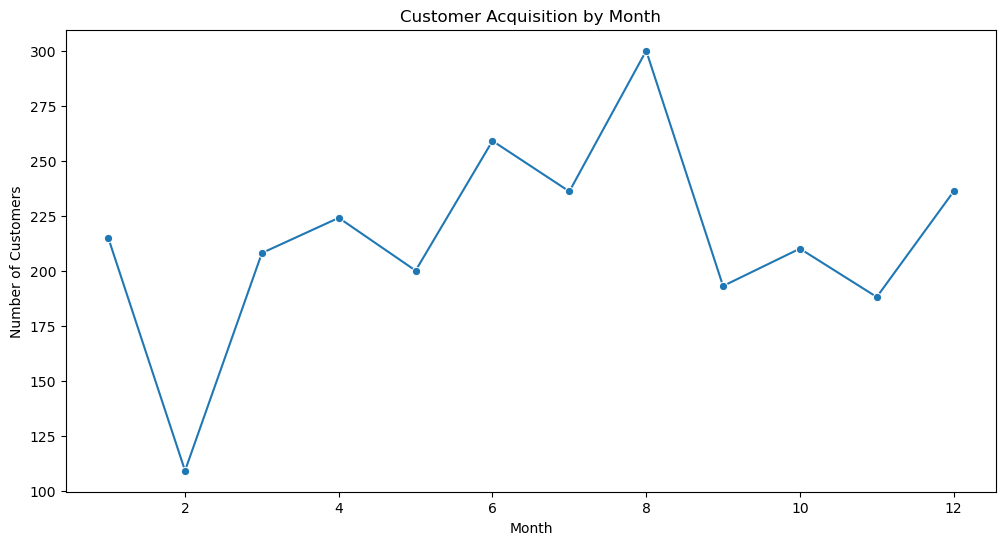

In [50]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=customer_acquisition, marker='o')
plt.title("Customer Acquisition by Month")
plt.xlabel("Month")
plt.ylabel("Number of Customers")
plt.show()

In [29]:
# Understand the retention of customers on month on month basis

In [51]:
# Customer Retention
customer_retention = merged_data.groupby("Transaction_month")["CustomerID"].nunique().pct_change()

In [52]:
customer_retention

Transaction_month
1          NaN
2    -0.493023
3     0.908257
4     0.076923
5    -0.107143
6     0.295000
7    -0.088803
8     0.271186
9    -0.356667
10    0.088083
11   -0.104762
12    0.255319
Name: CustomerID, dtype: float64

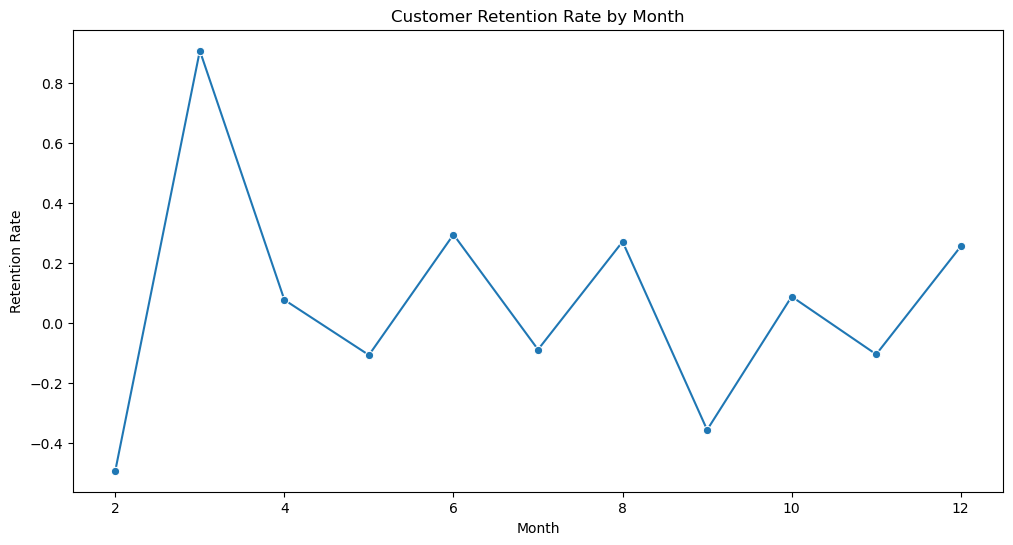

In [53]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=customer_retention, marker='o')
plt.title("Customer Retention Rate by Month")
plt.xlabel("Month")
plt.ylabel("Retention Rate")
plt.show()

In [33]:
# How the revenues from existing/new customers on month on month basis

In [54]:
# Revenue Analysis
revenue_analysis = merged_data.groupby("Transaction_month")["Invoice_Value"].sum()

In [55]:
revenue_analysis

Transaction_month
1    -1.010595e+08
2    -7.804332e+07
3    -8.775200e+07
4    -1.011068e+08
5    -7.728526e+07
6    -8.100651e+07
7    -9.360293e+07
8    -1.004775e+08
9    -9.047835e+07
10   -1.015719e+08
11   -1.259229e+08
12   -1.303679e+08
Name: Invoice_Value, dtype: float64

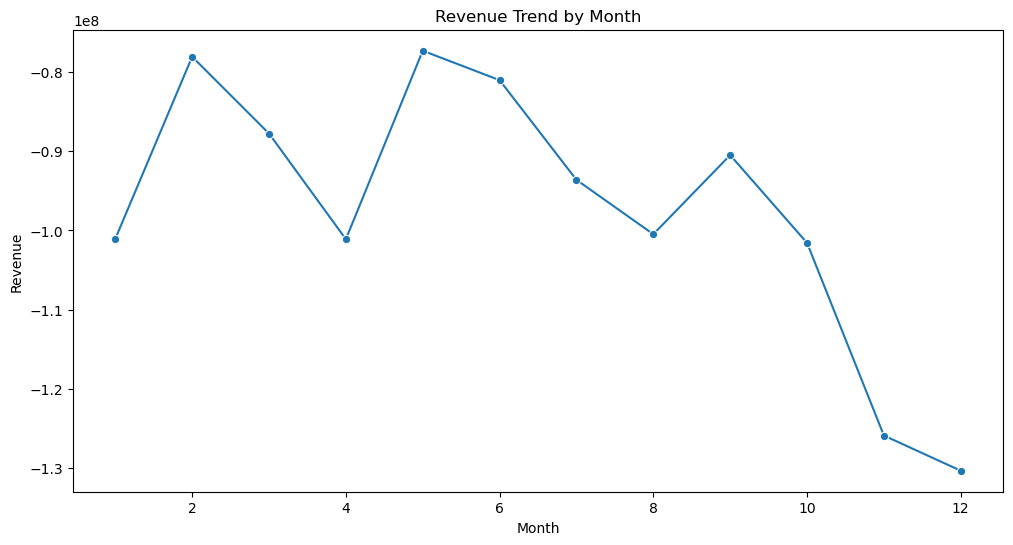

In [56]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=revenue_analysis, marker='o')
plt.title("Revenue Trend by Month")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()


In [37]:
 # How the discounts playing role in the revenues?

In [57]:
# Discount Impact on Revenue
discount_impact = merged_data.groupby("Transaction_month")["Invoice_Value"].sum() / merged_data.groupby("Transaction_month")["Discount_pct"].sum()

In [58]:
discount_impact

Transaction_month
1    -104.668418
2    -100.209706
3     -85.229220
4    -102.800969
5     -71.306892
6     -81.155836
7     -75.060086
8     -68.497456
9     -88.226800
10   -101.906114
11   -132.595096
12   -120.657412
dtype: float64

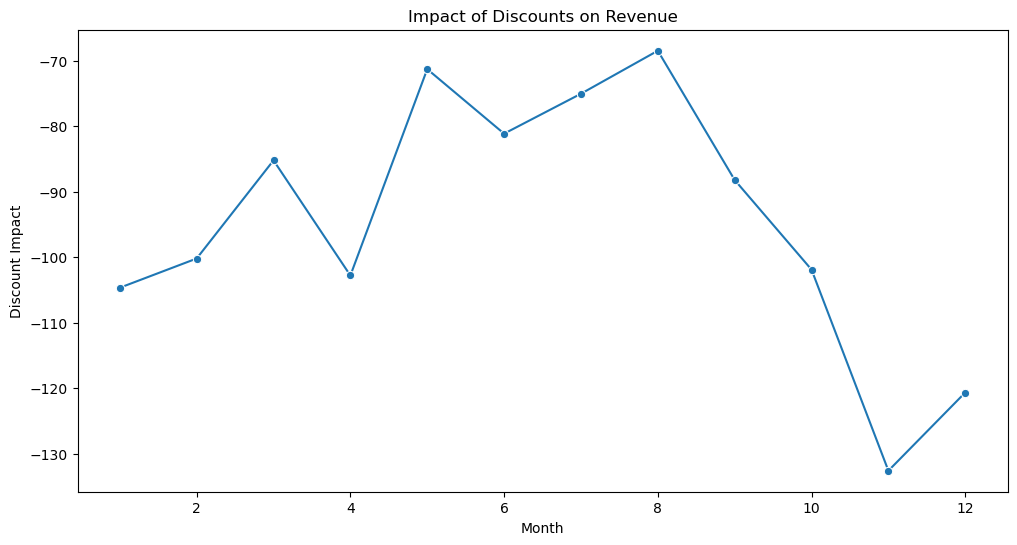

In [59]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=discount_impact, marker='o')
plt.title("Impact of Discounts on Revenue")
plt.xlabel("Month")
plt.ylabel("Discount Impact")
plt.show()

In [41]:
# Analyse KPI’s like Revenue, number of orders, average order value, number of 
# customers (existing/new), quantity, by category, by month, by week, by day etc…
# Understand the trends/seasonality of sales by category, location, month etc…

In [60]:
# KPI Analysis
kpi_analysis = merged_data.groupby("Transaction_month").agg({
    "Invoice_Value": "sum",
    "Transaction_ID": "count",
    "CustomerID": "nunique",
    "Quantity": "sum"
})

In [61]:
kpi_analysis

,Invoice_Value,Transaction_ID,CustomerID,Quantity
Transaction_month,,,,
1,-1.010595e+08,48316,215,239997
2,-7.804332e+07,38979,109,197085
3,-8.775200e+07,51536,208,246760
4,-1.011068e+08,49228,224,299419
5,-7.728526e+07,54248,200,222424
6,-8.100651e+07,49942,259,257921
7,-9.360293e+07,62407,236,271641
8,-1.004775e+08,73382,300,328626
9,-9.047835e+07,51291,193,231972


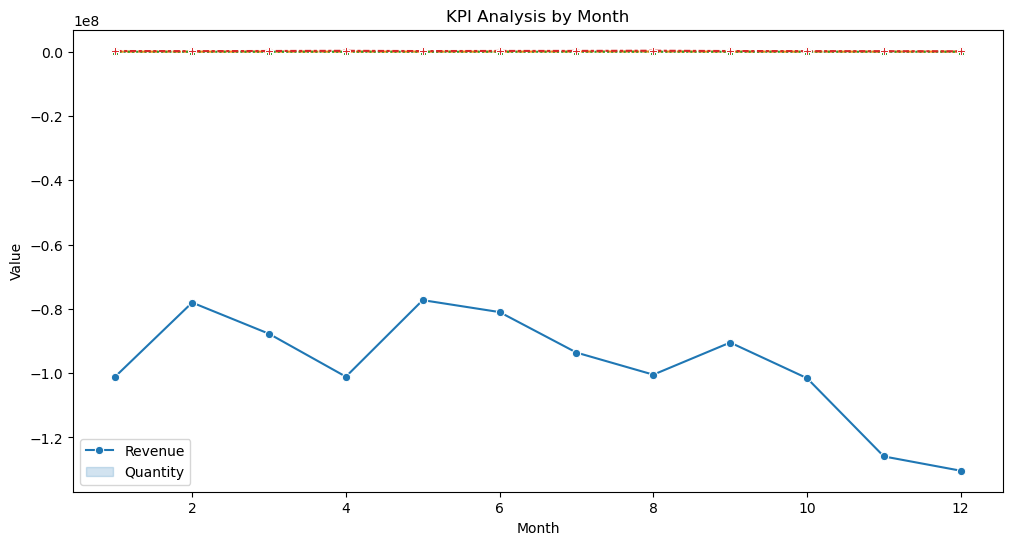

In [62]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=kpi_analysis, markers=True)
plt.title("KPI Analysis by Month")
plt.xlabel("Month")
plt.ylabel("Value")
plt.legend(["Revenue", "Quantity"])
plt.show()

In [63]:
# How number order varies and sales with different days

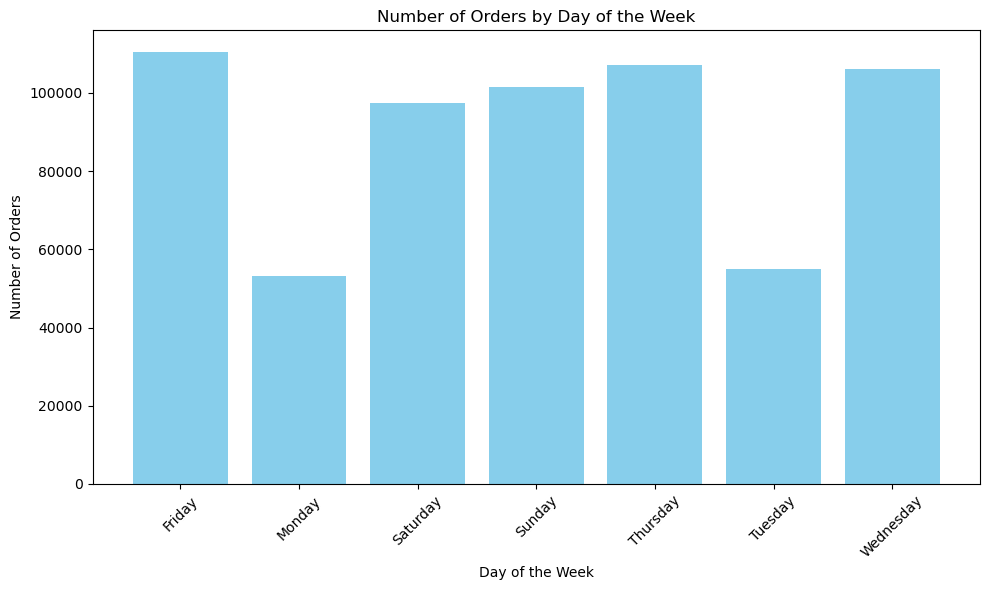

In [64]:
# Extract day of the week from Transaction_Date
merged_data['Transaction_DayOfWeek'] = merged_data['Transaction_Date'].dt.day_name()

# Group by day of the week and calculate total number of orders and total sales
daily_orders_sales = merged_data.groupby('Transaction_DayOfWeek').agg(
    {'Transaction_ID': 'count', 'Invoice_Value': 'sum'})

# Plotting Number of Orders by Day of the Week
plt.figure(figsize=(10, 6))
plt.bar(daily_orders_sales.index, daily_orders_sales['Transaction_ID'], color='skyblue')
plt.title('Number of Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



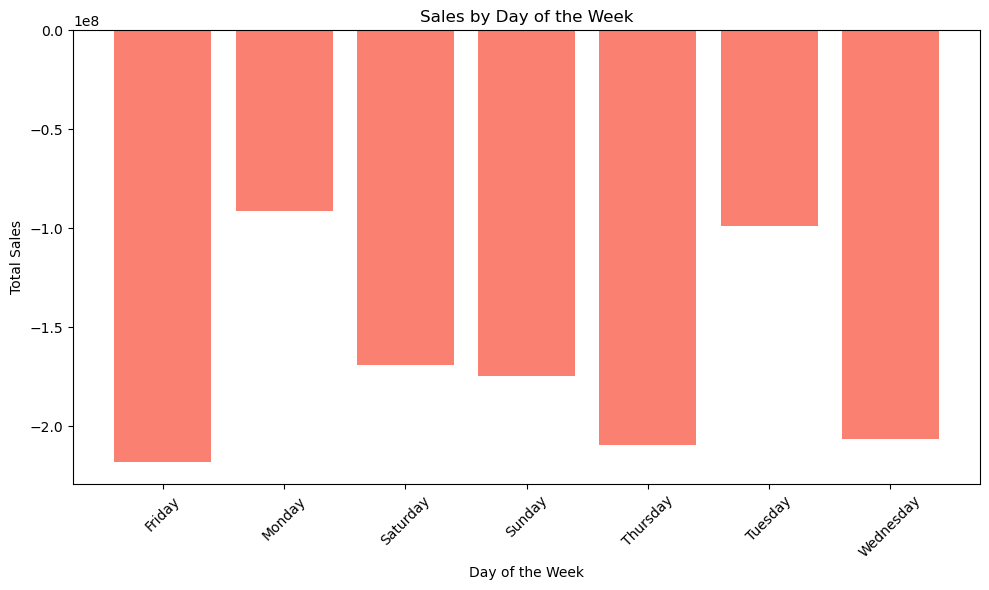

In [65]:
# Plotting Sales by Day of the Week
plt.figure(figsize=(10, 6))
plt.bar(daily_orders_sales.index, daily_orders_sales['Invoice_Value'], color='salmon')
plt.title('Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [66]:
daily_orders_sales

,Transaction_ID,Invoice_Value
Transaction_DayOfWeek,,
Friday,110488,-2.183682e+08
Monday,53183,-9.116652e+07
Saturday,97420,-1.689111e+08
Sunday,101447,-1.748806e+08
Thursday,107164,-2.097024e+08
Tuesday,54969,-9.884971e+07
Wednesday,106017,-2.067964e+08


In [67]:
# Calculate the Revenue, Marketing spend, percentage of marketing spend out of 
# revenue, Tax, percentage of delivery charges by month

In [68]:
monthly_summary = merged_data.groupby('Transaction_month').agg(
    {'Invoice_Value': 'sum', 'Online_Spend': 'sum', 'GST': 'sum', 'Delivery_Charges': 'sum'})

# Calculate percentage of marketing spend out of revenue
monthly_summary['Percentage_Marketing_Spend'] = (monthly_summary['Online_Spend'] / 
                                                 monthly_summary['Invoice_Value']) * 100

# Calculate percentage of delivery charges out of revenue
monthly_summary['Percentage_Delivery_Charges'] = (monthly_summary['Delivery_Charges'] / 
                                                  monthly_summary['Invoice_Value']) * 100


In [69]:
monthly_summary

,Invoice_Value,Online_Spend,GST,Delivery_Charges,Percentage_Marketing_Spend,Percentage_Delivery_Charges
Transaction_month,,,,,,
1,-1.010595e+08,9.141450e+07,6362.64,701661.57,-90.456162,-0.694306
2,-7.804332e+07,7.557066e+07,5305.26,582213.68,-96.831688,-0.746013
3,-8.775200e+07,8.265592e+07,7302.36,713367.13,-94.192632,-0.812935
4,-1.011068e+08,9.727013e+07,7014.24,491709.32,-96.205319,-0.486327
5,-7.728526e+07,8.985455e+07,7864.04,489602.06,-116.263505,-0.633500
6,-8.100651e+07,8.855685e+07,7153.04,445127.82,-109.320665,-0.549496
7,-9.360293e+07,1.077274e+08,9037.22,576989.36,-115.089803,-0.616422
8,-1.004775e+08,1.377828e+08,10900.64,727644.57,-137.127898,-0.724186
9,-9.047835e+07,8.815646e+07,7140.30,489388.08,-97.433767,-0.540890


In [70]:
# How marketing spend is impacting on revenue?

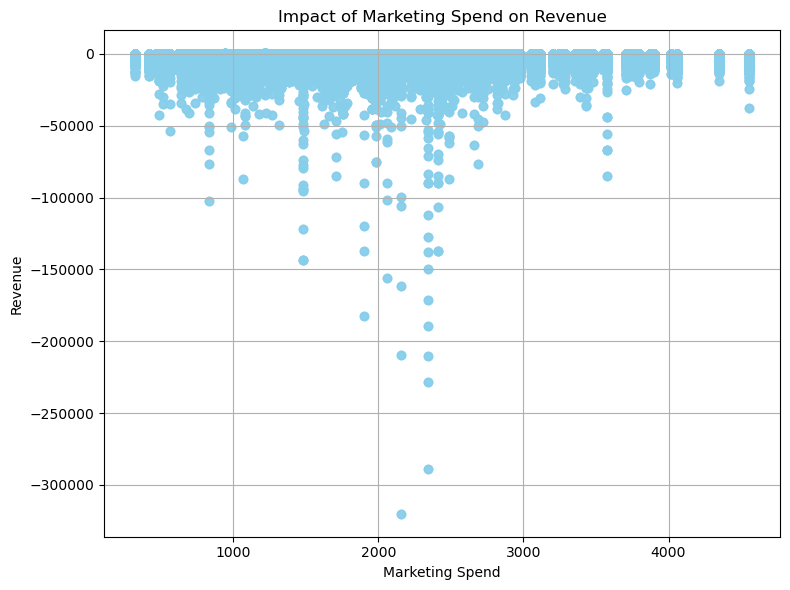

Correlation between Marketing Spend and Revenue: -0.03200761924119568


In [71]:
# Calculate correlation between marketing spend and revenue
correlation = merged_data['Online_Spend'].corr(merged_data['Invoice_Value'])

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(merged_data['Online_Spend'], merged_data['Invoice_Value'], color='skyblue', alpha=0.5)
plt.title('Impact of Marketing Spend on Revenue')
plt.xlabel('Marketing Spend')
plt.ylabel('Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Correlation between Marketing Spend and Revenue:", correlation)


In [72]:
# Which product was appeared in the transactions?

In [73]:
unique_categories = merged_data['Product_Category'].unique()

# Display the list of unique product categories
print("Product Categories Appeared in the Transactions:")
for category in unique_categories:
    print(category)


Product Categories Appeared in the Transactions:
Nest-USA
Office
Apparel
Bags
Drinkware
Lifestyle
Notebooks & Journals
Headgear
Waze
Fun
Nest-Canada
Backpacks
Google
Bottles
Gift Cards
More Bags
Housewares
Android
Accessories
Nest


In [74]:
# Which product was purchased mostly based on the quantity

In [75]:
# Group by product SKU and calculate total quantity
product_quantity = merged_data.groupby('Product_SKU')['Quantity'].sum()

# Find the product with the highest total quantity
most_purchased_product = product_quantity.idxmax()
max_quantity = product_quantity.max()

print("Product Purchased the Most Based on Quantity:")
print("Product SKU:", most_purchased_product)
print("Total Quantity Purchased:", max_quantity)


Product Purchased the Most Based on Quantity:
Product SKU: GGOEGGOA017399
Total Quantity Purchased: 194808


In [77]:
merged_data.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,Tenure_Months,GST,Month,Coupon_Code,Discount_pct,Transaction_month,Offline_Spend,Online_Spend,Invoice_Value,Transaction_DayOfWeek
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,12,0.1,Jan,ELEC10,10.0,1,4500,2424.5,-1515.229,Tuesday
1,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,12,0.1,Feb,ELEC20,20.0,1,4500,2424.5,-3206.039,Tuesday
2,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,12,0.1,Mar,ELEC30,30.0,1,4500,2424.5,-4896.849,Tuesday
3,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,12,0.1,Apr,ELEC10,10.0,1,4500,2424.5,-1515.229,Tuesday
4,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,12,0.1,May,ELEC20,20.0,1,4500,2424.5,-3206.039,Tuesday


# 3. Performing Customer Segmentation

In [59]:
# Heuristic (Value based, RFM) – Divide the customers into Premium, Gold, Silver, 
# Standard customers and define strategy on the same

In [78]:
# Calculate RFM metrics for each customer
rfm_data = merged_data.groupby('CustomerID').agg({
    'Transaction_Date': lambda x: (merged_data['Transaction_Date'].max() - x.max()).days,  # Recency
    'Transaction_ID': 'count',  # Frequency
    'Invoice_Value': 'sum'  # Monetary
}).reset_index()

# Rename columns for clarity
rfm_data.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Define quartiles for each RFM metric
quantiles = rfm_data.quantile(q=[0.25, 0.50, 0.75])

# Function to segment customers based on RFM scores
def rfm_segment(row):
    r_score = 4 if row['Recency'] <= quantiles.loc[0.25, 'Recency'] else 3 if row['Recency'] <= quantiles.loc[0.50, 'Recency'] else 2 if row['Recency'] <= quantiles.loc[0.75, 'Recency'] else 1
    f_score = 4 if row['Frequency'] >= quantiles.loc[0.75, 'Frequency'] else 3 if row['Frequency'] >= quantiles.loc[0.50, 'Frequency'] else 2 if row['Frequency'] >= quantiles.loc[0.25, 'Frequency'] else 1
    m_score = 4 if row['Monetary'] >= quantiles.loc[0.75, 'Monetary'] else 3 if row['Monetary'] >= quantiles.loc[0.50, 'Monetary'] else 2 if row['Monetary'] >= quantiles.loc[0.25, 'Monetary'] else 1
    return str(r_score) + str(f_score) + str(m_score)

# Apply segmentation function to create RFM segments
rfm_data['RFM_Segment'] = rfm_data.apply(rfm_segment, axis=1)

# Define segment labels based on RFM scores
segment_labels = {
    '111': 'Standard',
    '112': 'Standard',
    '113': 'Standard',
    '114': 'Standard',
    '121': 'Standard',
    '122': 'Standard',
    '123': 'Standard',
    '124': 'Standard',
    '131': 'Standard',
    '132': 'Standard',
    '133': 'Standard',
    '134': 'Standard',
    '141': 'Standard',
    '142': 'Standard',
    '143': 'Standard',
    '144': 'Standard',
    '211': 'Silver',
    '212': 'Silver',
    '213': 'Silver',
    '214': 'Silver',
    '221': 'Silver',
    '222': 'Silver',
    '223': 'Silver',
    '224': 'Silver',
    '231': 'Silver',
    '232': 'Silver',
    '233': 'Silver',
    '234': 'Silver',
    '241': 'Silver',
    '242': 'Silver',
    '243': 'Silver',
    '244': 'Silver',
    '311': 'Gold',
    '312': 'Gold',
    '313': 'Gold',
    '314': 'Gold',
    '321': 'Gold',
    '322': 'Gold',
    '323': 'Gold',
    '324': 'Gold',
    '331': 'Gold',
    '332': 'Gold',
    '333': 'Gold',
    '334': 'Gold',
    '341': 'Gold',
    '342': 'Gold',
    '343': 'Gold',
    '344': 'Gold',
    '411': 'Premium',
    '412': 'Premium',
    '413': 'Premium',
    '414': 'Premium',
    '421': 'Premium',
    '422': 'Premium',
    '423': 'Premium',
    '424': 'Premium',
    '431': 'Premium',
    '432': 'Premium',
    '433': 'Premium',
    '434': 'Premium',
    '441': 'Premium',
    '442': 'Premium',
    '443': 'Premium',
    '444': 'Premium'
}

# Fill missing segment labels based on RFM segment codes with a default label ('Other')
rfm_data['RFM_Segment_Label'] = rfm_data['RFM_Segment'].map(segment_labels).fillna('Other')

# Display RFM segments with filled segment labels
print("RFM Segments with Filled Segment Labels:")
print(rfm_data[['CustomerID', 'RFM_Segment', 'RFM_Segment_Label']])


RFM Segments with Filled Segment Labels:
      CustomerID RFM_Segment RFM_Segment_Label
0          12346         314              Gold
1          12347         341              Gold
2          12348         333              Gold
3          12350         423           Premium
4          12356         333              Gold
...          ...         ...               ...
1463       18259         114          Standard
1464       18260         332              Gold
1465       18269         214            Silver
1466       18277         314              Gold
1467       18283         341              Gold

[1468 rows x 3 columns]


In [79]:
rfm_data['RFM_Segment_Label'].value_counts()

RFM_Segment_Label
Gold        372
Premium     369
Standard    366
Silver      361
Name: count, dtype: int64

In [80]:
# Scientific (Using K-Means) & Understand the profiles. Define strategy for each segment.

In [81]:
# Standardize RFM data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_data[['Recency', 'Frequency', 'Monetary']])

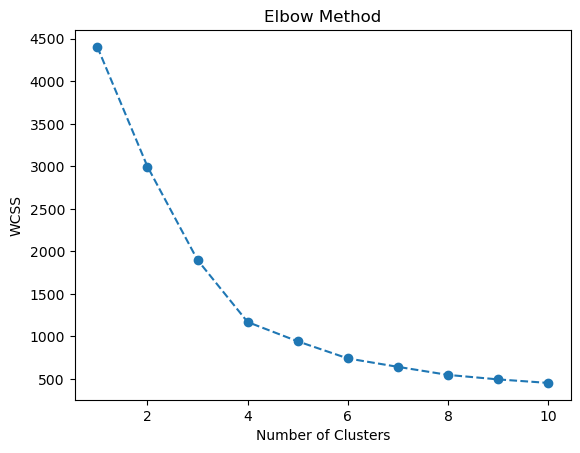

In [82]:
# Determine optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [83]:
# Based on the elbow method, choose the optimal number of clusters (e.g., k=4)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
rfm_data['Cluster'] = kmeans.fit_predict(rfm_scaled)

In [84]:
rfm_data['Cluster']

0       0
1       1
2       0
3       0
4       0
       ..
1463    3
1464    0
1465    3
1466    0
1467    1
Name: Cluster, Length: 1468, dtype: int32

In [85]:
# Display cluster centroids
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
print("Cluster Centers:")
print(pd.DataFrame(cluster_centers, columns=['Recency', 'Frequency', 'Monetary']))

Cluster Centers:
      Recency    Frequency      Monetary
0   77.746053   314.788158 -5.639960e+05
1   82.915584  1437.642857 -2.809709e+06
2   29.200000  7012.200000 -1.518764e+07
3  254.679417   245.885246 -4.215019e+05


In [86]:
# Define strategies for each segment
cluster_strategies = {
    0: 'Strategy for Cluster 0',
    1: 'Strategy for Cluster 1',
    2: 'Strategy for Cluster 2',
    3: 'Strategy for Cluster 3'
}

# Map cluster strategies to segments
rfm_data['Cluster_Strategy'] = rfm_data['Cluster'].map(cluster_strategies)

# Display cluster assignments and corresponding strategies
print("\nCluster Assignments and Strategies:")
rfm_data[['CustomerID', 'Cluster', 'Cluster_Strategy']]



Cluster Assignments and Strategies:


,CustomerID,Cluster,Cluster_Strategy
0,12346,0,Strategy for Cluster 0
1,12347,1,Strategy for Cluster 1
2,12348,0,Strategy for Cluster 0
3,12350,0,Strategy for Cluster 0
4,12356,0,Strategy for Cluster 0
...,...,...,...
1463,18259,3,Strategy for Cluster 3
1464,18260,0,Strategy for Cluster 0
1465,18269,3,Strategy for Cluster 3
1466,18277,0,Strategy for Cluster 0


# 4. Predicting Customer Lifetime Value (Low Value/Medium Value/High Value)

In [87]:
# First define dependent variable with categories low value, medium value, high value using customer revenue.
# AnalytixLabs, Website: www.analytixlabs.co.in Email: info@analytixlabs.co.in phone: +91-88021-73069
# Then perform Classification model.

In [88]:
# Define dependent variable categories based on customer revenue
# Example: divide customers into quartiles based on revenue
rfm_data['CLV_Category'] = pd.qcut(rfm_data['Monetary'], q=3, labels=['Low Value', 'Medium Value', 'High Value'])

# Define features and target variable
X = rfm_data[['Recency', 'Frequency', 'Monetary']]  # Example features
y = rfm_data['CLV_Category']

In [89]:
y

0         High Value
1          Low Value
2       Medium Value
3       Medium Value
4       Medium Value
            ...     
1463      High Value
1464    Medium Value
1465      High Value
1466      High Value
1467       Low Value
Name: CLV_Category, Length: 1468, dtype: category
Categories (3, object): ['Low Value' < 'Medium Value' < 'High Value']

In [90]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
# Initialize and train a classification model (e.g., Random Forest)
clf = RandomForestClassifier(n_estimators=50, random_state=42,max_depth=5)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=50, random_state=42)

In [92]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate model performance
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

  High Value       1.00      1.00      1.00        92
   Low Value       1.00      1.00      1.00        97
Medium Value       1.00      1.00      1.00       105

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294



In [93]:
# You can further analyze feature importance to understand which features contribute most to CLV prediction
feature_importances = pd.DataFrame(clf.feature_importances_, index=X.columns, columns=['Importance'])
print("Feature Importances:")
print(feature_importances)

Feature Importances:
           Importance
Recency      0.040763
Frequency    0.334895
Monetary     0.624341


# 5. Cross-Selling (Which products are selling together)

In [94]:
# You can perform exploratory analysis & market basket analysis to understand which of items can be bundled together.

In [95]:
# Convert transactional data into binary format
basket = pd.get_dummies(merged_data.set_index('Transaction_ID')['Product_Description']).groupby('Transaction_ID').max()

# Convert counts to binary (1 if count > 0, else 0)
basket[basket > 0] = 1

In [96]:
# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(basket, min_support=0.001, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [97]:
# Filter rules for cross-selling opportunities
cross_selling_rules = rules[(rules['lift'] > 1) & (rules['confidence'] > 0.5)]

# Sort rules by lift or confidence for interpretation
cross_selling_rules = cross_selling_rules.sort_values(by=['lift'], ascending=False)

# Print top cross-selling rules
print("Top Cross-Selling Rules:")
cross_selling_rules.head()


Top Cross-Selling Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
401,(Nest Detect - USA),(Nest Secure Alarm System Starter Pack - USA),0.002953,0.019872,0.001756,0.594595,29.921958,0.001697,2.417650,0.969442
447,"(Android Sticker Sheet Ultra Removable, YouTub...",(Google Laptop and Cell Phone Stickers),0.001117,0.032162,0.001037,0.928571,28.872120,0.001002,13.549739,0.966444
453,"(Google Doodle Decal, YouTube Custom Decals)",(Google Laptop and Cell Phone Stickers),0.001516,0.032162,0.001077,0.710526,22.092432,0.001029,3.343442,0.956185


# 6. Predicting Next Purchase Day(How soon each customer can visit the store (0-30 days, 30-60 days, 60-90 days, 90+ days)

In [98]:
# For this, we need create dependent variable at customer level (average days per one 
# transaction for only repeat customers and divide into groups 0-30 days, 30-60 days, 60-90 days and 90+ days) 
# then build classification model to predict next purchase of given customer.

In [99]:
import pandas as pd

# Assuming avg_days_between_purchases contains the average days between purchases for all customers
avg_days_between_purchases = merged_data.groupby('CustomerID')['Transaction_month'].diff().mean()

# Repeat the average days between purchases for each customer
avg_days_between_purchases_series = pd.Series([avg_days_between_purchases] * len(merged_data))

# Create dependent variable at customer level
# Categorize the average days into different groups
bins = [-1, 30, 60, 90, float('inf')]
labels = ['0-30 days', '30-60 days', '60-90 days', '90+ days']
merged_data['next_purchase_range'] = pd.cut(avg_days_between_purchases_series, bins=bins, labels=labels)

# Now next_purchase_range contains the group for each customer based on the average days between purchases


In [100]:
numeric_columns = merged_data.select_dtypes(include=['int', 'float'])

In [101]:
numeric_columns.isnull().sum()

CustomerID             0
Transaction_ID         0
Quantity               0
Avg_Price              0
Delivery_Charges       0
Tenure_Months          0
GST                    0
Discount_pct         400
Transaction_month      0
Offline_Spend          0
Online_Spend           0
Invoice_Value        400
dtype: int64

In [102]:
numeric_columns.drop(columns=['Discount_pct','Invoice_Value'], inplace=True)

In [103]:
from sklearn.metrics import accuracy_score
# Assuming X contains the features and y contains the target variable (next_purchase_range)
X = numeric_columns
y = merged_data['next_purchase_range']


# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

# Predict next purchase day
predictions = classifier.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


Accuracy: 1.0


# 7. Perform cohort analysis by defining below cohorts

In [104]:
# Customers who started in each month and understand their behaviour
# Which Month cohort has maximum retention?

In [105]:
# the month and year of the first purchase for each customer
merged_data['First_Purchase_Month'] = merged_data.groupby('CustomerID')['Transaction_Date'].transform('min').dt.to_period('M')

# Group customers into cohorts based on their first purchase month
cohorts = merged_data.groupby(['First_Purchase_Month', 'Transaction_month']).agg({'CustomerID': 'nunique'}).reset_index()

In [106]:
cohorts

,First_Purchase_Month,Transaction_month,CustomerID
0,2019-01,1,215
1,2019-01,2,13
2,2019-01,3,24
3,2019-01,4,34
4,2019-01,5,23
...,...,...,...
73,2019-10,11,6
74,2019-10,12,4
75,2019-11,11,68
76,2019-11,12,7


In [107]:
# Which Month cohort has maximum retention?

In [108]:
initial_customer_count = cohorts.groupby('First_Purchase_Month')['CustomerID'].transform('nunique')
cohorts['Retention_Rate'] = cohorts['CustomerID'] / initial_customer_count


In [109]:
cohorts['Retention_Rate']

0      21.500000
1       1.300000
2       2.400000
3       3.400000
4       2.300000
         ...    
73      2.000000
74      1.333333
75     34.000000
76      3.500000
77    106.000000
Name: Retention_Rate, Length: 78, dtype: float64

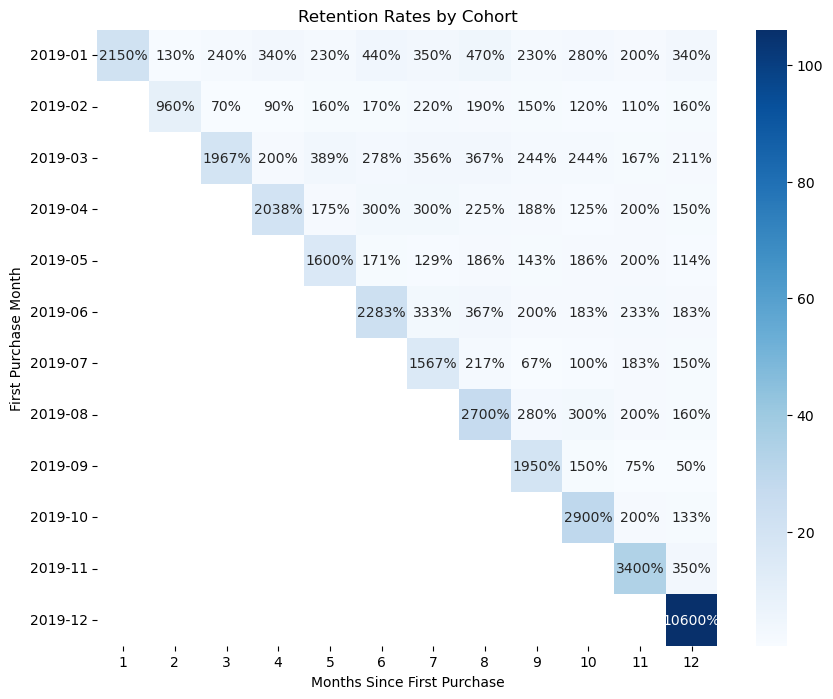

In [110]:
# Pivot the cohort table to visualize the retention rates
cohort_pivot = cohorts.pivot_table(index='First_Purchase_Month', columns='Transaction_month', values='Retention_Rate')

# Plot the retention rates
plt.figure(figsize=(10, 8))
plt.title('Retention Rates by Cohort')
sns.heatmap(cohort_pivot, annot=True, cmap='Blues', fmt='.0%')
plt.xlabel('Months Since First Purchase')
plt.ylabel('First Purchase Month')
plt.show()